In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
base_dir = "C:\\datasets\\spe\\selected tax datasets"
file_paths = [
    'can_ab_tax_prices.csv',
    'can_bc_tax_prices.csv',
    'can_nb_tax_prices.csv',
    'can_nl_tax_prices.csv',
    'can_nt_tax_prices.csv',
    'can_pe_tax_prices.csv',
    'can_qc_cat_prices.csv',
    'can_tax_I_prices.csv',
]
file_paths2 = [
    'can_ab_ets_prices.csv',
    'can_nb_ets_prices.csv',
    'can_nl_ets_prices.csv',
    'can_ns_ets_prices.csv',
    'can_sk_ets_prices.csv',
    'can_obps_prices.csv',
]
names = ["Alberta", "British Columbia", "New Brunswick", "Newfoundland and Labrador", "NorthWest Territories", "Prince Edward Island", "Quebec", "General"]
schemes = ["can_ab_tax", "can_bc_tax", "can_nb_tax", "can_nl_tax", "can_nt_tax", "can_pe_tax", "can_qc_cat", "can_tax_I"]
for i, path in enumerate(file_paths):
    file_paths[i] = base_dir + "\\" + path
dfs = [pd.read_csv(file_path) for file_path in file_paths]
combined_df = pd.concat(dfs, ignore_index=True)

In [41]:
df = combined_df[['scheme_id', 'year', 'product', 'rate']]
# add names to the schemes in a new column
df['scheme_name'] = df['scheme_id'].apply(lambda x: names[schemes.index(x)])
# drop nan rows
df = df.dropna()
df

C:\Users\sinaz\AppData\Local\Temp\ipykernel_57080\2799610135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scheme_name'] = df['scheme_id'].apply(lambda x: names[schemes.index(x)])


,scheme_id,year,product,rate,scheme_name
0,can_ab_tax,2017,Coal,20.0,Alberta
1,can_ab_tax,2018,Coal,30.0,Alberta
2,can_ab_tax,2019,Coal,30.0,Alberta
3,can_ab_tax,2020,Coal,30.0,Alberta
4,can_ab_tax,2021,Coal,40.0,Alberta
...,...,...,...,...,...
124,can_tax_I,2019,Natural gas,20.0,General
125,can_tax_I,2020,Natural gas,30.0,General
126,can_tax_I,2021,Natural gas,40.0,General
127,can_tax_I,2022,Natural gas,50.0,General


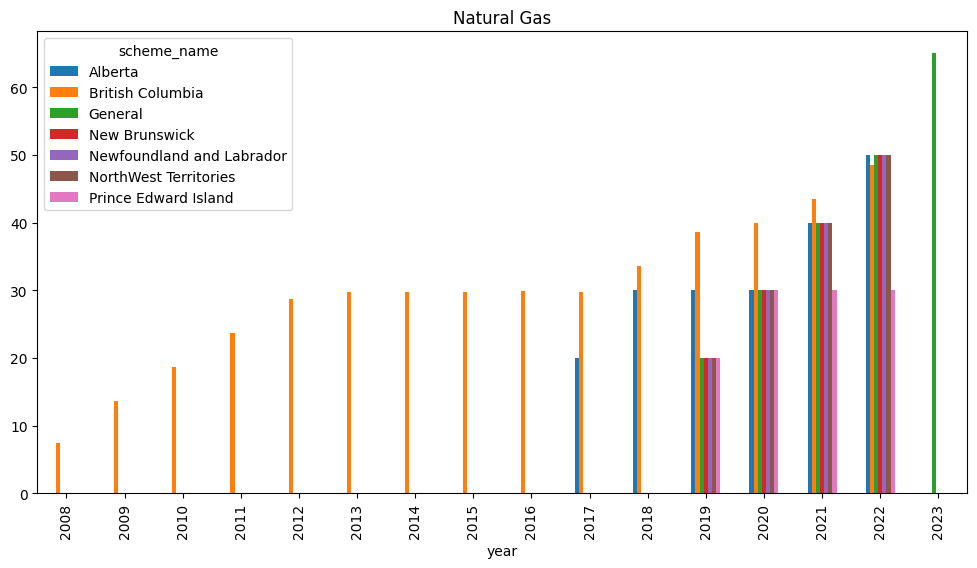

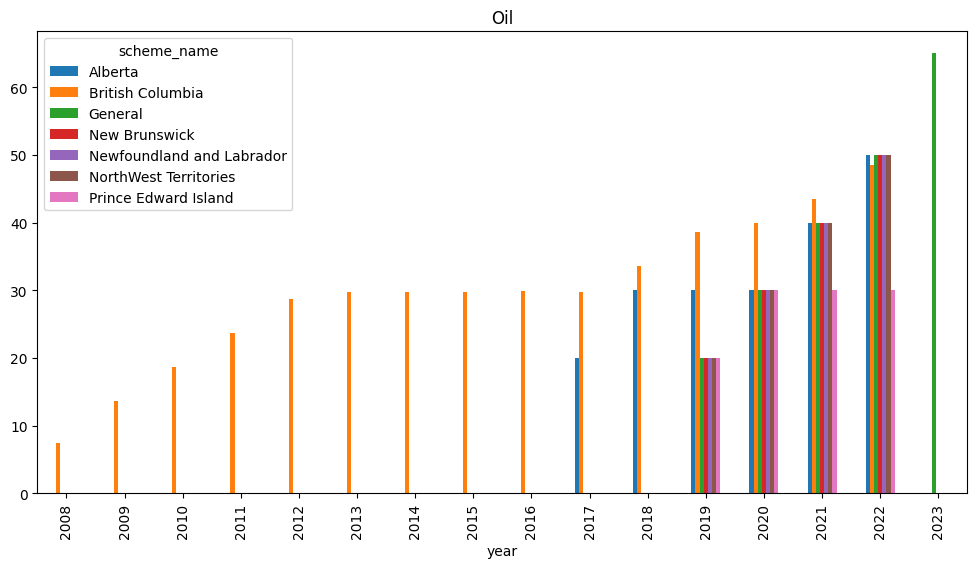

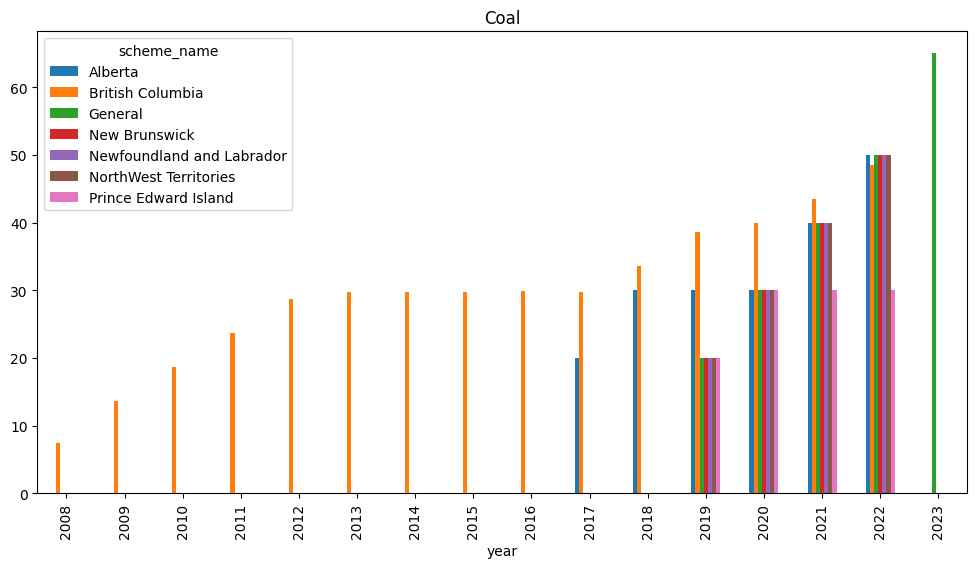

In [58]:
# on a bar chart, show the prices of each scheme_name over the years. I want to see years in the x-axis and for each year 
# i want to see multiple bars, one for each scheme_name. I want to have this for different products.
# I want to have a separate chart for each product
natural_gas_df = df[df['product'] == 'Natural gas'].reset_index()
natural_gas_df = natural_gas_df[['scheme_name', 'year', 'rate']]

oil_df = df[df['product'] == 'Oil'].reset_index()
oil_df = oil_df[['scheme_name', 'year', 'rate']]

coal_df = df[df['product'] == 'Coal'].reset_index()
coal_df = coal_df[['scheme_name', 'year', 'rate']]

schemes = ['Natural Gas', 'Oil', 'Coal']
df_list = [natural_gas_df, oil_df, coal_df]

for i, temp_df in enumerate(df_list):
    temp_df = temp_df.pivot(index='year', columns='scheme_name', values='rate')
    temp_df.plot(kind='bar', figsize=(12, 6))
    plt.title(schemes[i])
    plt.show()

c:\Users\sinaz\.conda\envs\test\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\sinaz\.conda\envs\test\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


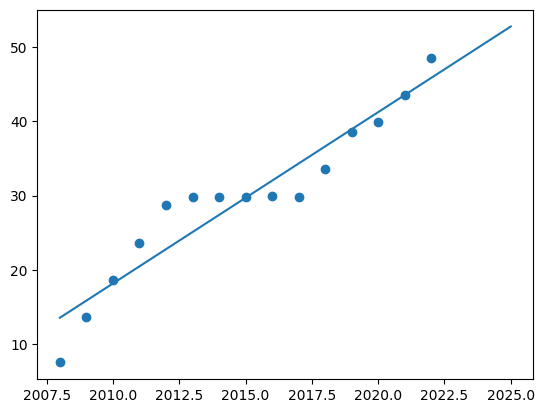

In [92]:
# write a simple regression model to predict the rate of a product based on the year and the scheme_name
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for British Columbia scheme
bc_df = natural_gas_df[natural_gas_df['scheme_name'] == 'British Columbia'].reset_index()
bc_df = bc_df[['year', 'rate']]
X = bc_df[['year']]
y = bc_df['rate']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# predict for 2023 and 2024 and 2025 and plot them
X_test = [[2023], [2024], [2025]]
new_y_pred = model.predict(X_test)
all_x = np.concatenate((X, X_test))
new_y_pred = model.predict(X_test)

plt.scatter(X, y)
plt.plot(all_x, np.concatenate((y_pred, new_y_pred)))
plt.show()

In [108]:
df.to_csv('tax_data.csv', index=False)

In [109]:
# create a neural network model from sklearn to predict the rate of a product based on the year and the scheme_name, criterion should be mse
# we also need to use mean max scaler to scale the data
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(bc_df[['year']])
y = bc_df['rate']
model = MLPRegressor(hidden_layer_sizes=(10, 2), max_iter=1000)
model.fit(X, y)
X_test = scaler.transform([[2023], [2024], [2025]])

y_pred = model.predict(X)
new_y_pred = model.predict(X_test)

c:\Users\sinaz\.conda\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sinaz\.conda\envs\test\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


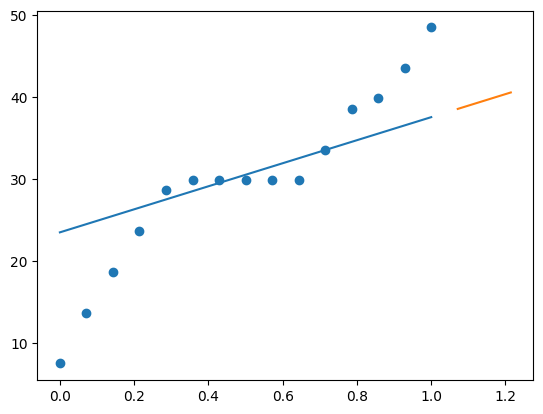

In [111]:
# now plot them
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.plot(X_test, new_y_pred)
plt.show()

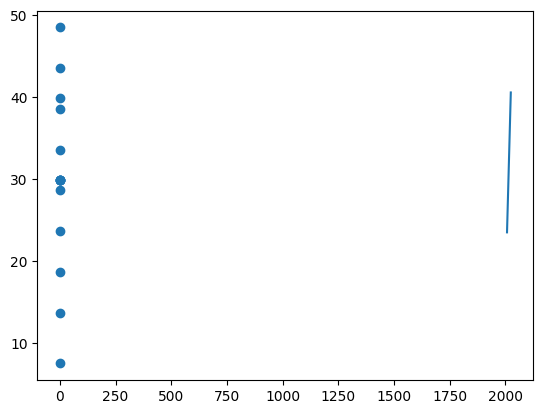

In [110]:
plt.scatter(X, y)
all_y = np.concatenate((y_pred, new_y_pred))
plt.plot(all_x, all_y)
plt.show()